<a href="https://colab.research.google.com/github/HarishChinnakadiri/Harish_INFO5731_Spring2024/blob/main/Chinnakadiri_Harish_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
import pandas as pd
from collections import defaultdict

def generate_ngrams(texts, n=3):

    ngrams = defaultdict(int)
    for text in texts:
        words = text.split()
        for i in range(len(words) - n + 1):
            ngram = tuple(words[i:i+n])
            ngrams[ngram] += 1
    return ngrams

def main(file_path):

    # Load the dataset
    data = pd.read_csv(file_path)

    # Extract the 'Cleaned Review' column as the list of texts for n-gram analysis
    texts = data['Cleaned Review'].tolist()

    # Generate and count 3-grams
    trigrams = generate_ngrams(texts, n=3)

    # Sort the trigrams by their frequency in descending order
    sorted_trigrams = sorted(trigrams.items(), key=lambda x: x[1], reverse=True)

    # Display the top 10 most frequent trigrams
    print("Top 10 most frequent trigrams and their counts:")
    for ngram, count in sorted_trigrams[:10]:
        print(f"{ngram}: {count}")

file_path = '/content/cleaned_reviews.csv'
main(file_path)


Top 10 most frequent trigrams and their counts:
('madelein', 'yuna', 'voyl'): 1000
('john', 'david', 'washington'): 800
('big', 'name', 'actor'): 600
('dynam', 'joshua', 'alfi'): 400
('want', 'like', 'movi'): 400
('make', 'thing', 'make'): 400
('thing', 'make', 'sen'): 400
('get', 'alphi', 'back'): 400
('alphi', 'back', 'simul'): 400
('movi', 'ive', 'seen'): 400


In [7]:
import pandas as pd
from collections import defaultdict

# Load the dataset
file_path = '/content/cleaned_reviews.csv'
data = pd.read_csv(file_path)

# Function to calculate bigram probabilities correctly
def calculate_correct_bigram_probabilities(texts):
    word_counts = defaultdict(int)
    bigram_counts = defaultdict(int)
    correct_bigram_probabilities = {}

    # Count occurrences of each word and each bigram
    for text in texts:
        words = text.split()
        for i in range(len(words) - 1):
            word_counts[words[i]] += 1
            bigram = (words[i], words[i+1])
            bigram_counts[bigram] += 1
        # Count the last word in the text
        if words:
            word_counts[words[-1]] += 1

    # Calculate probabilities for each bigram correctly
    for bigram, count in bigram_counts.items():
        correct_bigram_probabilities[bigram] = count / word_counts[bigram[0]]

    return correct_bigram_probabilities

# Extract the 'Cleaned Review' column as the list of texts for bigram analysis
texts = data['Cleaned Review'].tolist()

# Recalculate bigram probabilities with the correct method
correct_bigram_probabilities = calculate_correct_bigram_probabilities(texts)

# Optionally, to see some of the calculated probabilities
sample_correct_bigrams = list(correct_bigram_probabilities.items())[:10]  # Sample of 10 bigrams for clarity
print(sample_correct_bigrams)


[(('lesson', 'movi'), 1.0), (('movi', 'industri'), 0.01818181818181818), (('industri', 'use'), 0.5), (('use', 'budget'), 0.07692307692307693), (('budget', 'million'), 0.25), (('million', 'dollar'), 0.14285714285714285), (('dollar', 'use'), 1.0), (('use', 'splendidli'), 0.07692307692307693), (('splendidli', 'cinematographi'), 1.0), (('cinematographi', 'amaz'), 0.125)]


In [13]:
import pandas as pd
from collections import Counter, defaultdict

def load_data(file_path):
    return pd.read_csv(file_path)

def calculate_relative_probabilities(data):
    # Assuming the text is in a column named 'Cleaned Review'
    texts = data['Cleaned Review'].tolist()

    # Flatten the list of words for global frequency calculation
    all_words = [word for text in texts for word in text.split()]
    global_frequencies = Counter(all_words)
    max_global_frequency = max(global_frequencies.values())

    # Calculate frequencies of each word in each review
    review_frequencies = [Counter(review.split()) for review in texts]

    # Calculate relative probabilities
    relative_probabilities = []
    for review_freq in review_frequencies:
        review_probs = {word: (freq / global_frequencies[word]) / max_global_frequency for word, freq in review_freq.items()}
        relative_probabilities.append(review_probs)

    return relative_probabilities, list(global_frequencies.keys())

def create_probability_table(relative_probabilities, columns, index):
    # Initialize DataFrame
    df = pd.DataFrame(0, index=index, columns=columns)

    # Populate DataFrame
    for i, review_probs in enumerate(relative_probabilities, start=1):
        for word, prob in review_probs.items():
            df.at[i, word] = prob

    return df

# Load your dataset
file_path = '/content/cleaned_reviews.csv'
data = load_data(file_path)

# Calculate relative probabilities
relative_probabilities, words = calculate_relative_probabilities(data)

# Create the table
df_probs = create_probability_table(relative_probabilities, words, data.index + 1)

# The DataFrame df_probs now contains the calculated relative probabilities
# Here's how to display the first few rows of the DataFrame:
df_probs.head()


,lesson,movi,industri,use,budget,million,dollar,splendidli,cinematographi,amaz,...,ridicul,cg,outdo,major,competit,fraction,costuncharacterist,needl,drop,choic
1,4.310345e-07,3.134796e-08,2.155172e-07,9.946950e-08,2.155172e-07,6.157635e-08,4.310345e-07,4.310345e-07,5.387931e-08,1.077586e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000e+00,4.702194e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.077586e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000e+00,7.836991e-09,0.000000e+00,3.315650e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.077586e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,1.567398e-08,0.000000e+00,3.315650e-08,1.077586e-07,6.157635e-08,0.000000e+00,0.000000e+00,5.387931e-08,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000e+00,7.053292e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [14]:
# Write your code here
import numpy as np
import math

# Function to calculate term frequencies in a single document
def calculate_tf(document):
    tf_dict = {}
    doc_terms = document.split()
    total_terms = len(doc_terms)

    for term in doc_terms:
        tf_dict[term] = tf_dict.get(term, 0) + 1 / total_terms

    return tf_dict

# Function to calculate document frequency for each term across all documents
def calculate_df(documents):
    df_dict = defaultdict(int)

    for document in documents:
        unique_terms = set(document.split())
        for term in unique_terms:
            df_dict[term] += 1

    return df_dict

# Function to calculate inverse document frequency for each term
def calculate_idf(df_dict, total_documents):
    idf_dict = {}

    for term, count in df_dict.items():
        idf_dict[term] = math.log(total_documents / count)

    return idf_dict

# Function to calculate TF-IDF for each document
def calculate_tfidf(documents):
    total_documents = len(documents)
    tf_list = [calculate_tf(doc) for doc in documents]
    df_dict = calculate_df(documents)
    idf_dict = calculate_idf(df_dict, total_documents)

    tfidf_matrix = []

    for tf_dict in tf_list:
        tfidf_scores = {}
        for term, tf_score in tf_dict.items():
            tfidf_scores[term] = tf_score * idf_dict.get(term, 0)
        tfidf_matrix.append(tfidf_scores)

    return tfidf_matrix, list(df_dict.keys())

# Load and preprocess the dataset
documents = data['Cleaned Review'].tolist()

# Calculate the TF-IDF matrix
tfidf_matrix, terms = calculate_tfidf(documents)

# Since displaying the full TF-IDF matrix is impractical in this format,
# let's convert it into a more manageable structure and display a small part of it
# Convert TF-IDF matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix)

# Fill NaN values with 0, as they represent terms that do not appear in the document
tfidf_df = tfidf_df.fillna(0)

# Display the first few rows of the DataFrame
tfidf_df.head()








,lesson,movi,industri,use,budget,million,dollar,splendidli,cinematographi,amaz,...,ridicul,cg,outdo,major,competit,fraction,costuncharacterist,needl,drop,choic
0,0.039255,0.016025,0.030802,0.046572,0.051714,0.017404,0.039255,0.039255,0.013896,0.022349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.006614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.002281,0.000000,0.008840,0.000000,0.000000,0.000000,0.000000,0.000000,0.012726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.003387,0.000000,0.006562,0.010929,0.007356,0.000000,0.000000,0.005873,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.024638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import pandas as pd
import math
from collections import Counter, defaultdict

# Load the dataset
data = pd.read_csv('cleaned_reviews.csv')
documents = data['Cleaned Review'].tolist()

# Define the query
query_text = "The movie the blockbuster in the world and hero character is very interesting"

# Tokenize and preprocess the query similarly to the documents
query_tokens = query_text.lower().split()

# Calculate TF for each document and the query
def calculate_tf(text):
    tf_dict = {}
    words = text.split()
    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1
    total_words = len(words)
    tf_dict = {word: count/total_words for word, count in tf_dict.items()}
    return tf_dict

# Calculate DF for all terms in the corpus
def calculate_df(documents):
    df_dict = defaultdict(int)
    for document in documents:
        unique_terms = set(document.split())
        for term in unique_terms:
            df_dict[term] += 1
    return df_dict

# Calculate IDF using DF
def calculate_idf(df_dict, total_documents):
    idf_dict = {term: math.log(total_documents / (1 + freq)) for term, freq in df_dict.items()}
    return idf_dict

# Combine TF and IDF to calculate TF-IDF for all documents and the query
total_documents = len(documents) + 1 # Including the query as a document for IDF calculation
df_dict = calculate_df(documents + [query_text])
idf_dict = calculate_idf(df_dict, total_documents)

def calculate_tfidf_for_text(tf_dict, idf_dict):
    tfidf = {term: tf * idf_dict.get(term, 0) for term, tf in tf_dict.items()}
    return tfidf

documents_tf = [calculate_tf(doc) for doc in documents]
documents_tfidf = [calculate_tfidf_for_text(tf, idf_dict) for tf in documents_tf]
query_tf = calculate_tf(query_text)
query_tfidf = calculate_tfidf_for_text(query_tf, idf_dict)

# Cosine similarity calculation
def cosine_similarity(tfidf_a, tfidf_b):
    common_terms = set(tfidf_a.keys()) & set(tfidf_b.keys())
    dot_product = sum(tfidf_a[term] * tfidf_b[term] for term in common_terms)
    magnitude_a = math.sqrt(sum([val**2 for val in tfidf_a.values()]))
    magnitude_b = math.sqrt(sum([val**2 for val in tfidf_b.values()]))
    if magnitude_a == 0 or magnitude_b == 0:
        return 0
    else:
        return dot_product / (magnitude_a * magnitude_b)

# Calculate cosine similarity for each document against the query
cosine_similarities = [cosine_similarity(doc_tfidf, query_tfidf) for doc_tfidf in documents_tfidf]

# Rank documents based on cosine similarity scores
ranked_documents = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Display the ranking
for index, (doc_index, score) in enumerate(ranked_documents):
    print(f"Document {doc_index + 1}: Score {score:.4f}")
    # Displaying a snippet of the document for brevity
    print(f"Snippet: {documents[doc_index][:100]}...")
    print("-----")


Streaming output truncated to the last 5000 lines.
Snippet: know movi bad take asian immigr dad go watch first thing say watch okay communist wrote movi messag ...
-----
Document 2224: Score 0.0000
Snippet: nuclear warhead blownup lo angel human blame ai explos result nation declar war ai save human race h...
-----
Document 2226: Score 0.0000
Snippet: lesson movi industri use budget million dollar use splendidli cinematographi amaz terribl surpris ro...
-----
Document 2228: Score 0.0000
Snippet: termin film warn u danger spielbergkubrick movi paint differ pictur robot serv mankind gareth edward...
-----
Document 2229: Score 0.0000
Snippet: walk theater expect mix excit curio especi given film intrigu take aifrom getgo creator impress use ...
-----
Document 2230: Score 0.0000
Snippet: sigh selfproclaim scifi junki look forward new origin standalon scifi movi left fulli disappoint exa...
-----
Document 2232: Score 0.0000
Snippet: watch start finish without drawn stori pointi think john w

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [4]:
import numpy as np

In [9]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Load your dataset
file_path = '/content/cleaned_reviews.csv'
column_name = 'Cleaned Review'  # Update this to the name of the column containing the text
data = pd.read_csv(file_path)

# Preprocess the text: tokenize and lower case
# simple_preprocess from gensim does basic preprocessing such as tokenization and lowercasing.
# It's adjustable if you have more specific preprocessing needs.
documents = data[column_name].map(simple_preprocess)

# Train a Word2Vec model
# size: The number of dimensions of the embeddings
# window: The maximum distance between a target word and words around the target word
# min_count: The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
# workers: The number of worker threads used to train the model (faster training with multicore machines)
model = Word2Vec(sentences=documents, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec_model.model")

print("Word2Vec model trained and saved successfully.")



Word2Vec model trained and saved successfully.


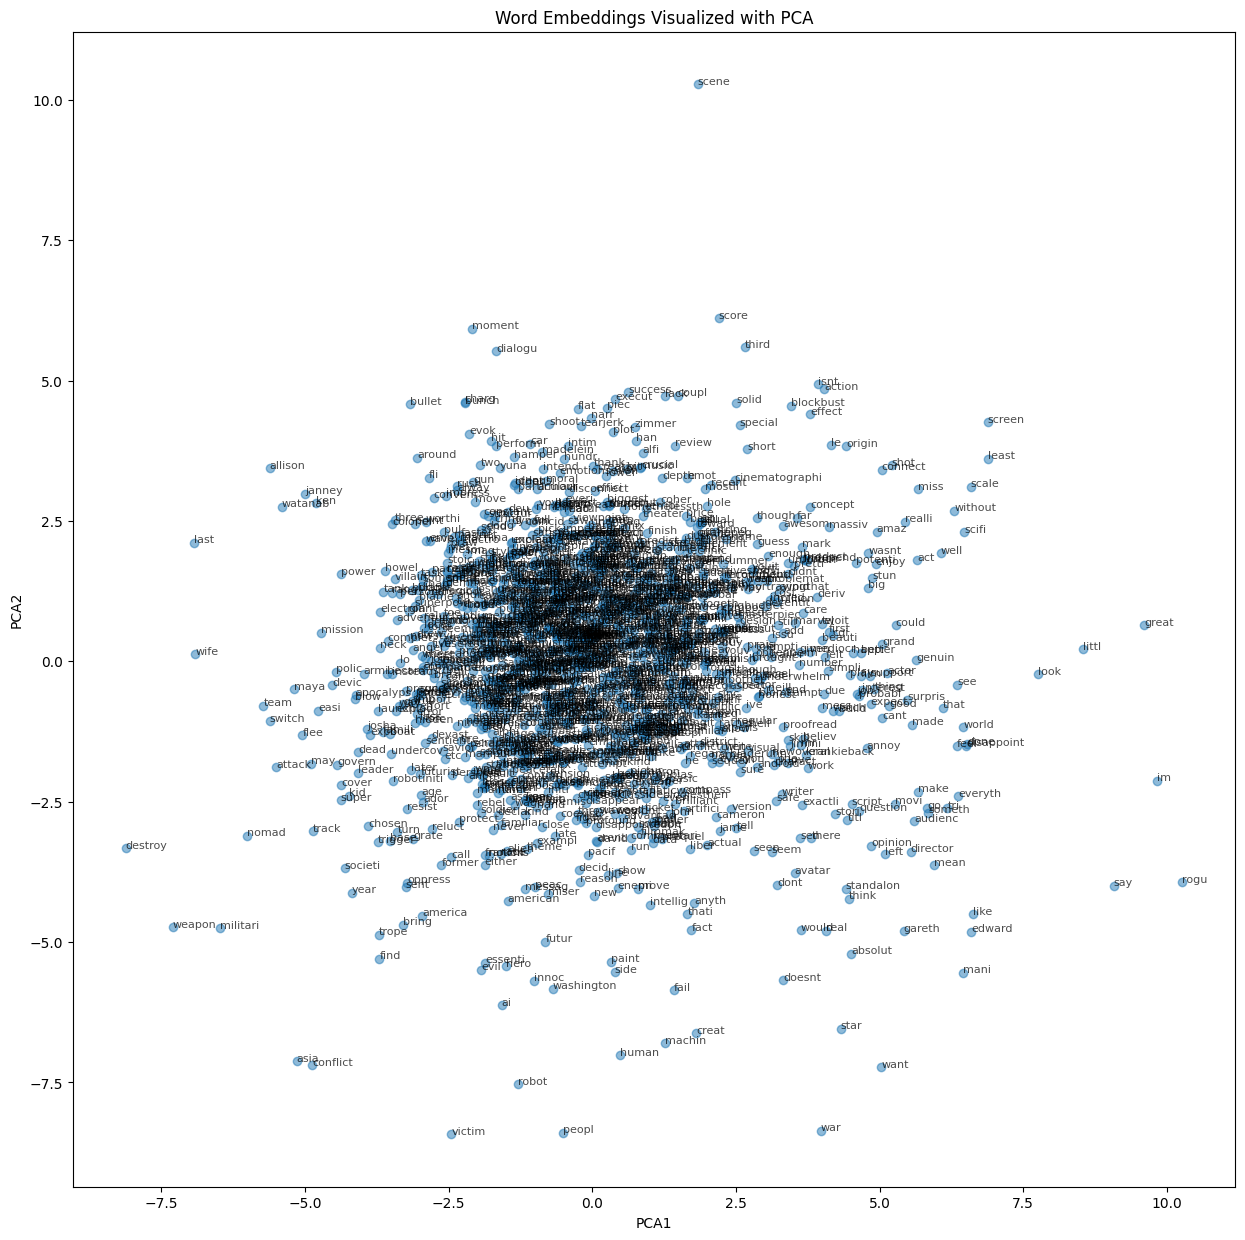

In [11]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming the model is loaded
model = Word2Vec.load("word2vec_model.model")

# Get all the word vectors and corresponding words
word_vectors = model.wv.vectors
words = list(model.wv.index_to_key)  # For gensim 4.0.0 and above

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(15, 15))  # Increase figure size to make room for labels
plt.scatter(result[:, 0], result[:, 1], alpha=0.5)  # Use alpha to adjust the dot opacity

# Label points with their corresponding words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8, alpha=0.7)

plt.title('Word Embeddings Visualized with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [2]:
# The GitHub link of your final csv file
 #  https://github.com/HarishChinnakadiri/Harish_INFO5731_Spring2024/blob/main/annotated_reviews_sentiment.csv

# Link:
 #  https://drive.google.com/file/d/1HBcyN_uHYPtbgXx7vwH1iek4016t0qm2/view?usp=sharing


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [5]:
# Type your answer
'''This assignment is very useful in understanding and learning N-grams , Undersand TF-IDF and Document representation,Create your own word embedding model
Using the data collected  to build a word embedding model using either Bert,word2vec . Visualizing the data .Creating my own training and evaluation data for sentiment analysis.
challenges i have faced are Data annotation: annotating the data for sentiment analysis can be exhausting since it requires an unbiased overview of the sentiment categories. Moreover, since some sentiments can be very context-dependent or nuanced, it is difficult to maintain objectivity.
Model training: Training your own word embedding model or a sentiment analysis model can be tough since beginners do not have enough technical understanding to fine-tune and train the model properly. Pre-trained models may have bad performance on the specific dataset as inaccurate sentiment labeling or inaccurate sentiment detection.
Learning experience – being a semi-real-world task, this assignment allows one to practice and master useful skills in the fields of NLP, sentiment analysis, and machine learning, improving one’s general competence in data science.
Insights – finding patterns, trends, and sentiments in the supplied data may be interesting and exciting, as it often offers some valuable knowledge about the users, their opinions, tastes, tendencies, and patterns of behavior.
Developing and improving the model – training the model, tweaking the parameters, and increasing the accuracy might be entertaining and intellectually entertaining.'''


'This assignment is very useful in understanding and learning N-grams , Undersand TF-IDF and Document representation,Create your own word embedding model\nUsing the data collected  to build a word embedding model using either Bert,word2vec . Visualizing the data .Creating my own training and evaluation data for sentiment analysis.\nchallenges i have faced are Data annotation: annotating the data for sentiment analysis can be exhausting since it requires an unbiased overview of the sentiment categories. Moreover, since some sentiments can be very context-dependent or nuanced, it is difficult to maintain objectivity.\nModel training: Training your own word embedding model or a sentiment analysis model can be tough since beginners do not have enough technical understanding to fine-tune and train the model properly. Pre-trained models may have bad performance on the specific dataset as inaccurate sentiment labeling or inaccurate sentiment detection.\nLearning experience – being a semi-real